# Author-Lincy Skariah


# Task #3- Exploratory Data Analysis - Retail


# Dataset-SampleSuperstore

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [358]:
#reading data 
df = pd.read_csv('Superstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [359]:
#datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [360]:
#describing statistical data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,59.901900
std,32063.693350,623.245101,2.225110,0.206452,228.277246
min,1040.000000,0.444000,1.000000,0.000000,0.000000
25%,23223.000000,17.280000,2.000000,0.000000,5.369000
50%,56430.500000,54.490000,3.000000,0.200000,13.963100
75%,90008.000000,209.940000,5.000000,0.200000,43.152450
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [361]:
#to check if any null value present
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [362]:
#total rows and columns
df.shape

(9994, 13)

In [363]:
#columns name
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [364]:
#unique products 
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [365]:
#number of each prodcuts sold
pd.value_counts(df['Sub-Category'])

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

# Which Category has earned maximum profit?

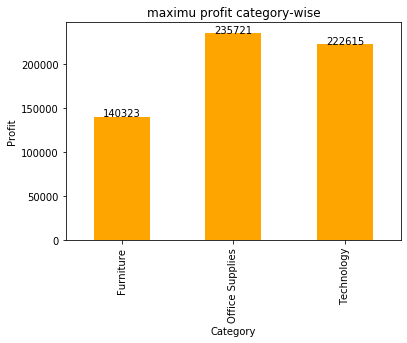

In [368]:
ax=df.groupby('Category')['Profit'].sum().plot(kind ='bar',color ='orange');
plt.title("maximu profit category-wise")
plt.ylabel('Profit')
for p in ax.patches:
    height =p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),y=height +0.2,ha='center',s='{:.0f}'.format(height))

office supplies has earned maximum profit

# Which Category has earned maximum profit?

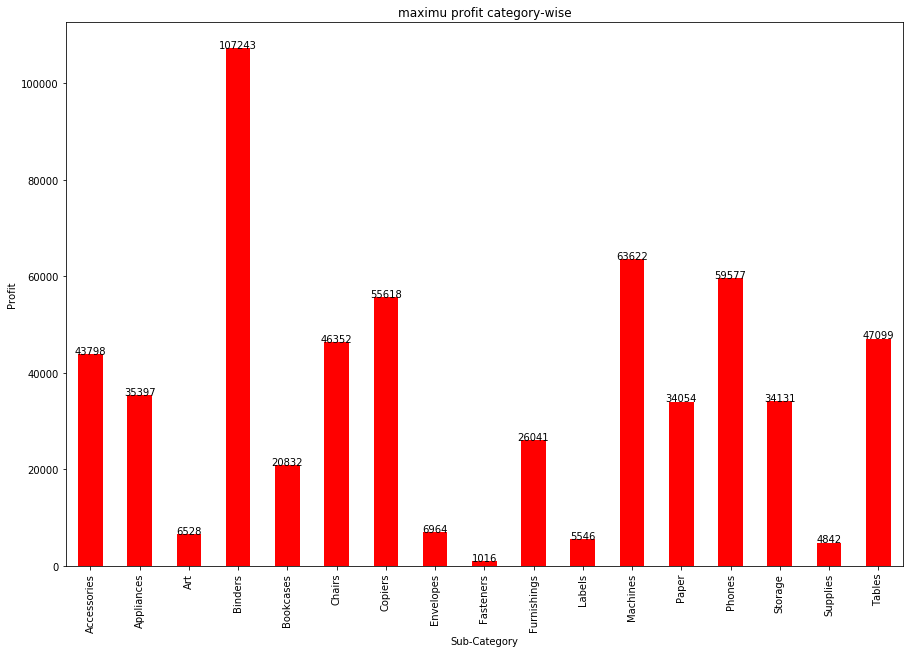

In [370]:
ax=df.groupby('Sub-Category')['Profit'].sum().plot(kind ='bar',color ='red');
plt.title("maximu profit category-wise")
plt.rcParams['figure.figsize']=(15,10)
plt.ylabel('Profit')
for p in ax.patches:
    height =p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),y=height +0.2,ha='center',s='{:.0f}'.format(height))

Binders have erarned the maximum profit

Office supplies have earmed the maximum profit 

# Performance fof different region

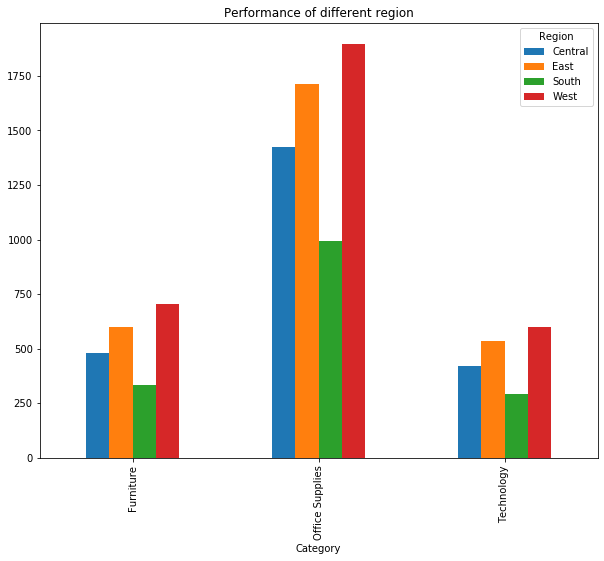

In [340]:
df = pd.DataFrame(pd.crosstab(df['Category'], df['Region']))
plt.rcParams['figure.figsize']=(10,8)
df.plot.bar(title='Performance of different region')
plt.show()

# Which ship mode is used maximum according the products

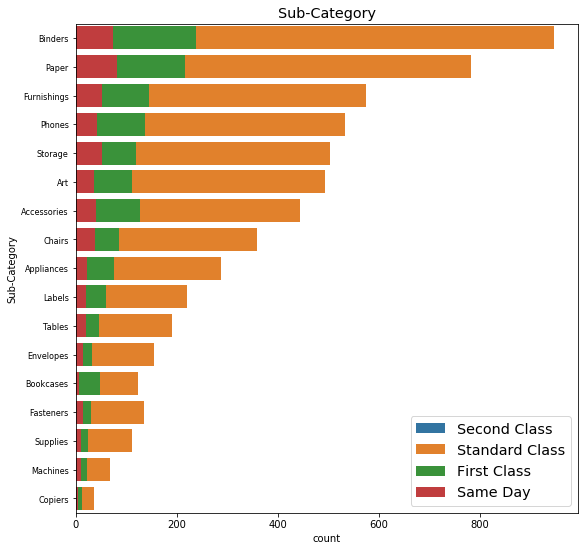

In [371]:
plt.figure(figsize=(9, 9))
sns.countplot(y='Sub-Category', data=df, order=df['Sub-Category'].value_counts().index,
              dodge=False, palette='tab10', hue='Ship Mode')
plt.title('Sub-Category', size='x-large')
plt.yticks(size = 8)
plt.legend(fontsize='x-large')
plt.show()

Standard class is prefered shipping 

# Which state hasdone the maximum sales

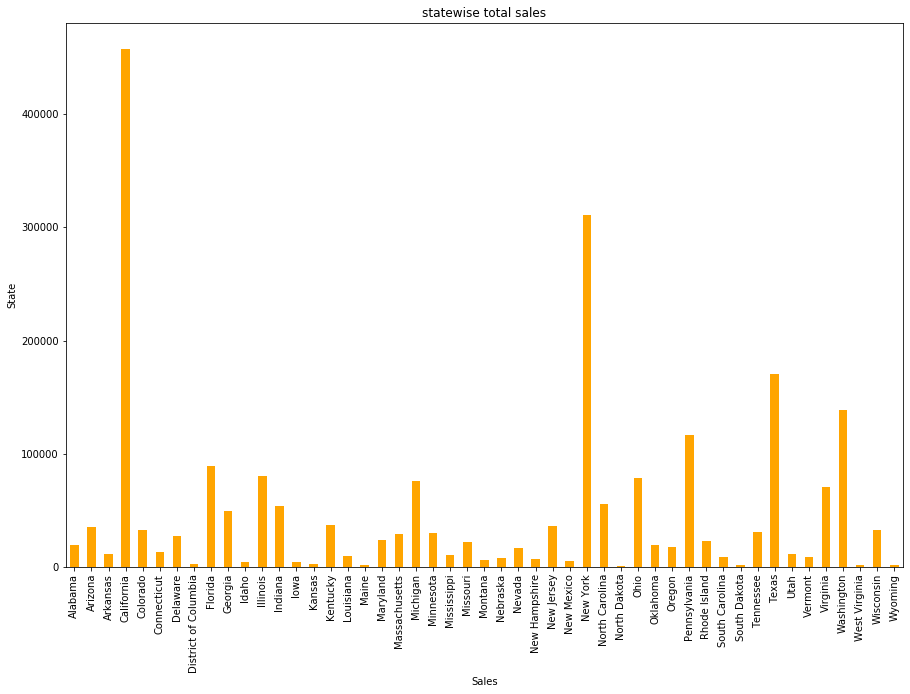

In [372]:
df.groupby('State')['Sales'].sum().plot(kind='bar',color='orange');
plt.title('statewise total sales')
plt.ylabel('State')
plt.xlabel('Sales');

maximum sales is done by state californa 

# Segment-wise purchase 

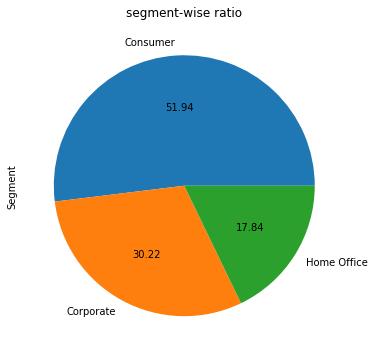

In [374]:
df['Segment'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title('segment-wise ratio'); 

# Which is the most prfoitable category and sub-category?

In [375]:
cat_subcate=pd.DataFrame(df.groupby(['Category','Sub-Category']).sum()['Profit'])

In [328]:
cat_subcate.sort_values(['Category','Profit'],ascending =False)

Profit
Category        Sub-Category             
Technology      Machines       63622.0933
                Phones         59576.9776
                Copiers        55617.8249
                Accessories    43797.8887
Office Supplies Binders       107242.7561
                Appliances     35397.2878
                Storage        34131.4340
                Paper          34053.5693
                Envelopes       6964.1767
                Art             6527.7870
                Labels          5546.2540
                Supplies        4842.1443
                Fasteners       1015.9086
Furniture       Tables         47098.8155
                Chairs         46351.8489
                Furnishings    26040.9704
                Bookcases      20831.8560